# Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [1]:
# Import necessary libraries. 
import math 
import numpy as np 
import pandas as pd 
from glob import glob

import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import PIL
import keras

import tensorflow as tf

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.utils import np_utils
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
data = np.load('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/images.npy')

In [4]:
labels = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/plant_seedlings/Labels.csv')


In [5]:
print(data.shape)

(4750, 128, 128, 3)


In [6]:
print(labels.shape)

(4750, 1)


In [7]:
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


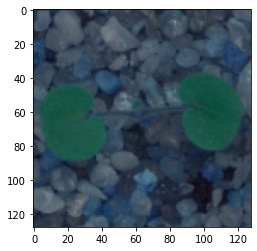

In [8]:
image = data[0]
plt.imshow(image);

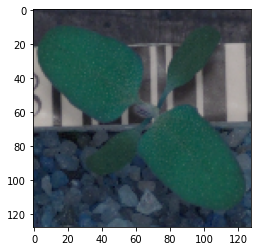

In [9]:
image = data[500]
plt.imshow(image);

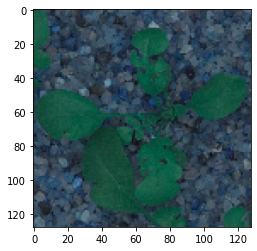

In [10]:
image = data[1000]
plt.imshow(image);

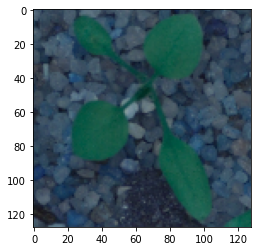

In [11]:
image = data[1424]
plt.imshow(image);

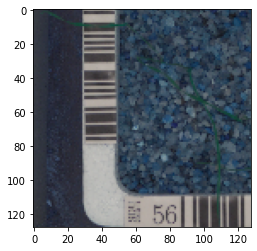

In [12]:
image = data[4097]
plt.imshow(image);

In [13]:
plantCounts = labels.value_counts()
plantCounts

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [14]:
noOfPlants = labels.nunique()
train_label=np.array(plantCounts.index)
print("Plant seedlings count : ", noOfPlants)
print("Plant seedlings types : ", train_label)

Plant seedlings count :  Label    12
dtype: int64
Plant seedlings types :  [('Loose Silky-bent',) ('Common Chickweed',) ('Scentless Mayweed',)
 ('Small-flowered Cranesbill',) ('Fat Hen',) ('Charlock',) ('Sugar beet',)
 ('Cleavers',) ('Black-grass',) ('Shepherds Purse',) ('Maize',)
 ('Common wheat',)]


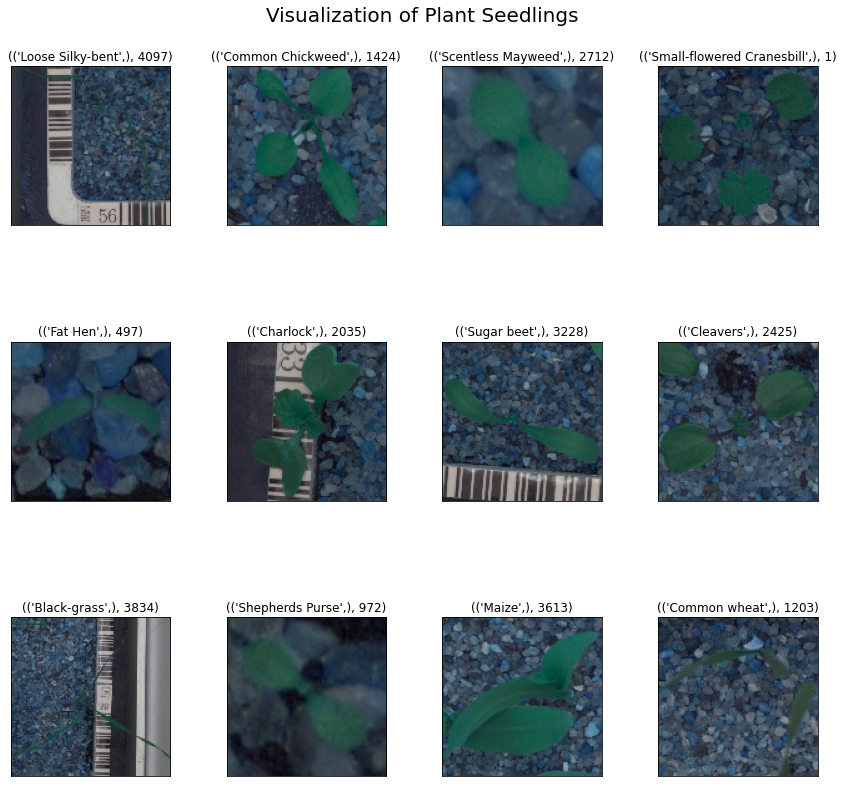

In [15]:
plt.figure(figsize=(12,12))

for i in range(12):  
    
    plt.subplot(3,4,i+1)
    labelValue = train_label[i]
    index = np.where(labels==labelValue)[0][1]
    plt.imshow(data[index])
    plt.title((labelValue, index))
    plt.xticks([]), plt.yticks([])

plt.suptitle("Visualization of Plant Seedlings", fontsize=20)    
plt.tight_layout()
plt.show()

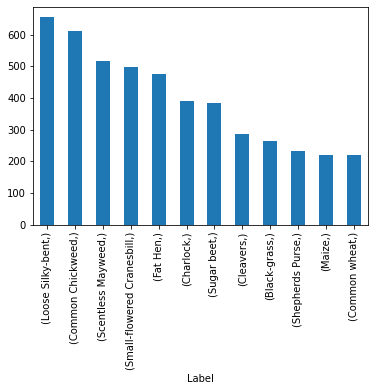

<Figure size 7200x3600 with 0 Axes>

In [16]:
prob = labels.value_counts()
threshold = 0.02
mask = prob > threshold
prob = prob.loc[mask]
prob.plot(kind='bar')
plt.xticks(rotation=90)
plt.figure(figsize=(100, 50))  
plt.show()

# Data Pre-processing: (15 Marks)

*   Normalization
*   Gaussian Blurring.
*   Visualize data after pre-processing.






**Normalization**

In [17]:
x = data.astype('float32') / 255.0

In [18]:
x.shape

(4750, 128, 128, 3)

In [19]:
x[0]

array([[[0.13725491, 0.20392157, 0.30588236],
        [0.14117648, 0.19215687, 0.29803923],
        [0.12156863, 0.1764706 , 0.27058825],
        ...,
        [0.30588236, 0.37254903, 0.44705883],
        [0.29803923, 0.3647059 , 0.43137255],
        [0.3137255 , 0.37254903, 0.42745098]],

       [[0.12941177, 0.18039216, 0.26666668],
        [0.14509805, 0.19607843, 0.28627452],
        [0.1882353 , 0.25490198, 0.3254902 ],
        ...,
        [0.31764707, 0.3764706 , 0.44313726],
        [0.2901961 , 0.34901962, 0.4117647 ],
        [0.3254902 , 0.37254903, 0.42745098]],

       [[0.13333334, 0.19607843, 0.26666668],
        [0.13725491, 0.20392157, 0.28235295],
        [0.27450982, 0.33333334, 0.39607844],
        ...,
        [0.3254902 , 0.38039216, 0.4392157 ],
        [0.30980393, 0.36862746, 0.42352942],
        [0.30980393, 0.36862746, 0.41960785]],

       ...,

       [[0.13725491, 0.19607843, 0.27058825],
        [0.16470589, 0.22352941, 0.28627452],
        [0.16470589, 0

In [20]:
data[0]


array([[[ 35,  52,  78],
        [ 36,  49,  76],
        [ 31,  45,  69],
        ...,
        [ 78,  95, 114],
        [ 76,  93, 110],
        [ 80,  95, 109]],

       [[ 33,  46,  68],
        [ 37,  50,  73],
        [ 48,  65,  83],
        ...,
        [ 81,  96, 113],
        [ 74,  89, 105],
        [ 83,  95, 109]],

       [[ 34,  50,  68],
        [ 35,  52,  72],
        [ 70,  85, 101],
        ...,
        [ 83,  97, 112],
        [ 79,  94, 108],
        [ 79,  94, 107]],

       ...,

       [[ 35,  50,  69],
        [ 42,  57,  73],
        [ 42,  57,  72],
        ...,
        [ 60,  76,  92],
        [ 67,  81,  97],
        [ 64,  77,  95]],

       [[ 36,  52,  67],
        [ 48,  63,  78],
        [ 41,  57,  73],
        ...,
        [ 44,  66,  83],
        [ 58,  76,  91],
        [ 57,  74,  90]],

       [[ 44,  58,  70],
        [ 43,  57,  73],
        [ 40,  55,  72],
        ...,
        [ 41,  70,  92],
        [ 55,  78,  97],
        [ 61,  79,  96]]

**Gaussian Blurring**

In [21]:
print(type(x))
print(x.shape)

<class 'numpy.ndarray'>
(4750, 128, 128, 3)


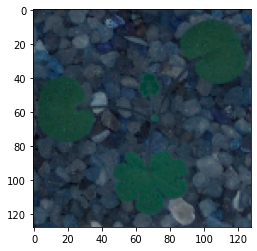

In [22]:
plt.imshow(x[1], cmap='gray')

In [23]:
new_x = np.empty(x.shape) 
new_x.shape

(4750, 128, 128, 3)

In [24]:
for idx, img in enumerate(x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)
  

*# vectorized operations is taking too much time with the code that I tried below. I am not sure what I am doing wrong in code below. so I have used loop which did not take time at all *

In [25]:
#x_new = np.apply_over_axes(lambda img: cv2.GaussianBlur(img, (5, 5), 0),x,(1,2,3))

# vectorized operations is taking too much time. Not sure what I am doing wrong. so using loop which is way too fast


#@title
# 
#x_new = np.apply_along_axis(
#    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
#    -1, 
#    x
#)
#x_new = x_new.reshape((-1, 28, 28))
#plt.imshow(new_x[3], cmap='gray')

**Visualize data after pre-processing**

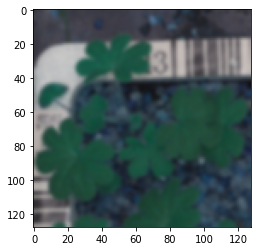

In [26]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[3], cmap='gray')

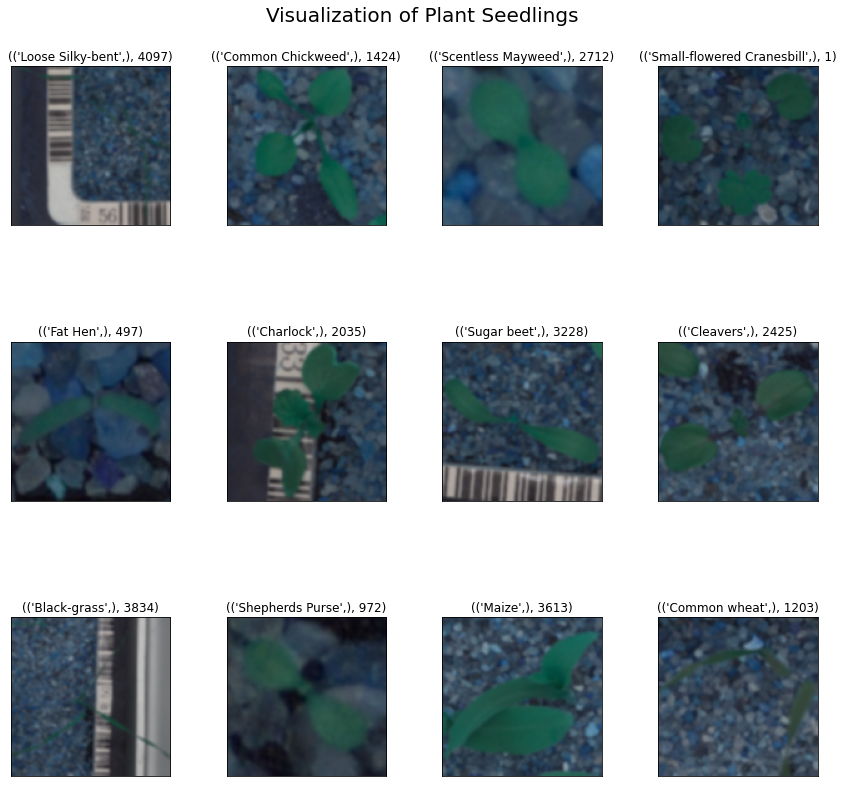

In [27]:
plt.figure(figsize=(12,12))

for i in range(12):  
    
    plt.subplot(3,4,i+1)
    labelValue = train_label[i]
    index = np.where(labels==labelValue)[0][1]
    plt.imshow(new_x[index])
    plt.title((labelValue, index))
    plt.xticks([]), plt.yticks([])

plt.suptitle("Visualization of Plant Seedlings", fontsize=20)    
plt.tight_layout()
plt.show()

# Make data compatible: (10 Marks)


*   Convert labels to one-hot-vectors.
*   Print the label for y_train[0].
*   Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data into test and validation set with test_size = 0.5)
*   Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape.



**One hot vectors**

In [28]:
# labels are strings so we cannot use to_categorical or one hot encoder directly to convert 
#convertedLabels = to_categorical(labelsArray,num_classes=train_label,dtype="float32")

# we can use get dummies 
#convertedLabels = pd.get_dummies(labels)

# we have to convert strings to int and then use one hot encoder 
from sklearn.preprocessing import LabelBinarizer 
label_binarizer = LabelBinarizer()
convertedLabels = label_binarizer.fit_transform(labels)

convertedLabels

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
tf.random.set_seed(1234)

**Split dataset and Check the shape of data**

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x, convertedLabels, test_size=0.3, random_state=0)

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [32]:
x_validation, x_test_new, y_validation, y_test_new = train_test_split(x_test, y_test, test_size=0.5, random_state=0)

In [33]:
print(x_validation.shape)
print(y_validation.shape)
print(x_test_new.shape)
print(y_test_new.shape)

(712, 128, 128, 3)
(712, 12)
(713, 128, 128, 3)
(713, 12)


**Print the label for y_train[0].**

In [34]:
y_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
print(y_train[0])
encoding = y_train[0]
index = np.where(encoding == 1)
print(train_label[index])

[1 0 0 0 0 0 0 0 0 0 0 0]
[('Loose Silky-bent',)]


Comment :

*The label of train image at index = 0 is Loose Silky-bent*

**Compatibility with Keras Models**

In [36]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [37]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [38]:
print(type(x_validation))
print(type(y_validation))
print(type(x_test_new))
print(type(y_test_new))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


***Keras model expect numpy array so data is already in compatible shape.***

# Building CNN: (15 Marks)

*   Define layers.
*   Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)





In [39]:
# Set the batch size, number of epochs.
batch_size = 32
num_classes = 12
epochs = 40

**Define layers**

In [74]:
batch_size = None

model = models.Sequential()
image_size = 256

#normalize data
model.add(layers.InputLayer(input_shape=(image_size,image_size,3,)))

model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=x_train.shape[1:]))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes,activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 256, 256, 32)      2432      
_________________________________________________________________
batch_normalization_11 (Batc (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 64)      51264     
_________________________________________________________________
batch_normalization_12 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 64, 64, 64)       

In [76]:
 #Initialize model
new_model = models.Sequential()

image_size = 256

#normalize data
new_model.add(layers.InputLayer(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
new_model.add(layers.Conv2D(64, kernel_size=(3,3),strides = (2,2), activation='relu'))

#normalize data
new_model.add(layers.BatchNormalization())

#Add Conv Layer
new_model.add(layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))

#Add Max Pool layer
new_model.add(layers.MaxPool2D(pool_size = (2,2)))

#normalize data
new_model.add(layers.BatchNormalization())

#Add Conv Layer
new_model.add(layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))

#Add Max Pool layer
new_model.add(layers.MaxPool2D(pool_size = (3,3)))

#normalize data
new_model.add(layers.BatchNormalization())

#Add Max Pool layer
new_model.add(layers.GlobalMaxPool2D())

#Add Dense Layers after flattening the data
new_model.add(layers.Flatten())

new_model.add(layers.Dense(256, activation='relu'))

#Add Dropout
new_model.add(layers.Dropout(0.5))

new_model.add(layers.Dense(256, activation='relu'))

#Add Dropout
new_model.add(layers.Dropout(0.4))

#Add Output Layer
new_model.add(layers.Dense(12, activation='softmax'))

In [42]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 127, 127, 64)      1792      
_________________________________________________________________
batch_normalization_4 (Batch (None, 127, 127, 64)      256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 125, 125, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 62, 62, 64)        256       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 20, 20, 128)      

**Optimizer and loss function (Use Adam optimizer and categorical crossentropy.)**

In [43]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [45]:
new_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [46]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

# Fit and evaluate model and print confusion matrix. (10 Marks)

**Fit Model**

Epoch 1/40
104/104 [==============================] - 7s 35ms/step - loss: 5.8742 - accuracy: 0.1628 - val_loss: 2.4940 - val_accuracy: 0.1348

Epoch 00001: val_loss improved from inf to 2.49401, saving model to cifar_cnn_checkpoint_01_loss2.4940.h5
Epoch 2/40
104/104 [==============================] - 3s 29ms/step - loss: 1.7674 - accuracy: 0.3952 - val_loss: 2.8801 - val_accuracy: 0.1348

Epoch 00002: val_loss did not improve from 2.49401
Epoch 3/40
104/104 [==============================] - 3s 28ms/step - loss: 1.5915 - accuracy: 0.4436 - val_loss: 3.4444 - val_accuracy: 0.1348

Epoch 00003: val_loss did not improve from 2.49401
Epoch 4/40
104/104 [==============================] - 3s 28ms/step - loss: 1.4794 - accuracy: 0.4768 - val_loss: 2.4817 - val_accuracy: 0.2205

Epoch 00004: val_loss improved from 2.49401 to 2.48172, saving model to cifar_cnn_checkpoint_04_loss2.4817.h5
Epoch 5/40
104/104 [==============================] - 3s 28ms/step - loss: 1.3417 - accuracy: 0.5462 - val

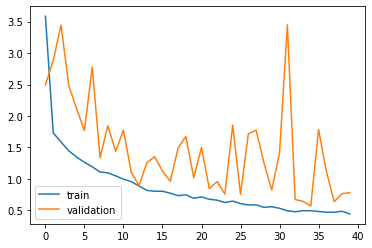

In [47]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_validation, y_validation),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

Epoch 1/40
104/104 [==============================] - 3s 23ms/step - loss: 2.7175 - accuracy: 0.1907 - val_loss: 5.6922 - val_accuracy: 0.1348

Epoch 00001: val_loss did not improve from 0.57106
Epoch 2/40
104/104 [==============================] - 2s 19ms/step - loss: 1.8518 - accuracy: 0.3312 - val_loss: 8.6410 - val_accuracy: 0.1348

Epoch 00002: val_loss did not improve from 0.57106
Epoch 3/40
104/104 [==============================] - 2s 19ms/step - loss: 1.6604 - accuracy: 0.4111 - val_loss: 8.8014 - val_accuracy: 0.1348

Epoch 00003: val_loss did not improve from 0.57106
Epoch 4/40
104/104 [==============================] - 2s 18ms/step - loss: 1.5110 - accuracy: 0.4609 - val_loss: 2.8474 - val_accuracy: 0.1910

Epoch 00004: val_loss did not improve from 0.57106
Epoch 5/40
104/104 [==============================] - 2s 18ms/step - loss: 1.4373 - accuracy: 0.4910 - val_loss: 2.7857 - val_accuracy: 0.1966

Epoch 00005: val_loss did not improve from 0.57106
Epoch 6/40
104/104 [=====

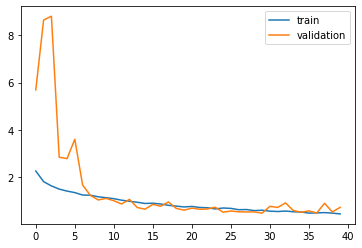

In [48]:
new_history = new_model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_validation, y_validation),
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(new_history.history['loss'], label='train')
plt.plot(new_history.history['val_loss'], label='validation')
plt.legend()
plt.show()

**Evaluate Model**

**Validation Score**

In [49]:
val_scores = model.evaluate(x_validation, y_validation, verbose=1)
print('Validation loss:', val_scores[0])
print('Validation accuracy:', val_scores[1])

23/23 [==============================] - 0s 9ms/step - loss: 0.7811 - accuracy: 0.7079
Validation loss: 0.7811152338981628
Validation accuracy: 0.7078651785850525


In [50]:
new_val_scores = new_model.evaluate(x_validation, y_validation, verbose=1)
print('Validation loss:', new_val_scores[0])
print('Validation accuracy:', new_val_scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 0.7278 - accuracy: 0.7893
Validation loss: 0.7277956604957581
Validation accuracy: 0.7893258333206177


Comment:
Every run gives different frequency so it will be difficult to optimize it without hyperparameter tuning


**#### -------- Test Score ------- ####**

In [51]:
# Score trained model.
scores = model.evaluate(x_test_new, y_test_new, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 11ms/step - loss: 0.8658 - accuracy: 0.6648
Test loss: 0.8657721281051636
Test accuracy: 0.6647966504096985


In [52]:
new_scores = new_model.evaluate(x_test_new, y_test_new, verbose=1)
print('Test loss:', new_scores[0])
print('Test accuracy:', new_scores[1])

23/23 [==============================] - 0s 9ms/step - loss: 0.7374 - accuracy: 0.7602
Test loss: 0.7374092936515808
Test accuracy: 0.7601683139801025


**Comments**

There is not a big difference between validation score and test score for both models. For second model (new_model), the two scores are very close.

Validation test was supposed to be used for hyper parameters testing but as project has not asked for it. Not performing hyper parameter tuning here.

In [53]:
y_pred = model.predict(x_test_new)
print(y_pred[1])
print(y_test_new[1])

[0.0047245  0.0972304  0.03248607 0.0030717  0.00092712 0.7424823
 0.00322744 0.03703037 0.01459866 0.00620721 0.02605073 0.03196349]
[0 0 0 0 0 1 0 0 0 0 0 0]


In [54]:
new_y_pred = new_model.predict(x_test_new)
print(new_y_pred[1])

[4.5861896e-07 4.2291002e-05 3.1922707e-05 3.8370283e-04 2.0199499e-07
 1.6588710e-01 6.1516607e-07 7.3816243e-04 7.0240264e-10 2.8789147e-05
 8.3288598e-01 6.6701563e-07]


**Confusion_matrix and Classification_report**

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

In [56]:
rounded_labels=np.argmax(y_test_new, axis=1)
y_classes = y_pred.argmax(axis=-1)


In [57]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(rounded_labels, y_classes)
print(cm)

=== Confusion Matrix ===
[[ 7  0  0  0  0  0 33  0  3  0  0  0]
 [ 0 29  5  0  2  0  0  0 22  0  0  1]
 [ 0  3 22  0 10  0  0  0  5  0  0  0]
 [ 0  0  0 58  0  0  1  1 28  4  0  0]
 [ 4  0  0  0 31  0  1  0  0  0  0  0]
 [ 1  1  0  1  0 53  1  0  3  0  1  1]
 [ 5  0  0  0  1  0 81  0  3  0  0  0]
 [ 0  2  0  0  0  1  1 24  4  0  1  5]
 [ 0  0  0  0  0  1  2  0 80  0  0  0]
 [ 0  0  0  0  0  0  0  0 15  9  0  0]
 [ 0  1  0  0  0  0  0  0 34  0 43  6]
 [ 0  0  0  0  4  1  0  1 18  1  0 37]]


In [58]:
print("=== Classification Report ===")
print(classification_report(rounded_labels, y_classes))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.41      0.16      0.23        43
           1       0.81      0.49      0.61        59
           2       0.81      0.55      0.66        40
           3       0.98      0.63      0.77        92
           4       0.65      0.86      0.74        36
           5       0.95      0.85      0.90        62
           6       0.68      0.90      0.77        90
           7       0.92      0.63      0.75        38
           8       0.37      0.96      0.54        83
           9       0.64      0.38      0.47        24
          10       0.96      0.51      0.67        84
          11       0.74      0.60      0.66        62

    accuracy                           0.66       713
   macro avg       0.74      0.63      0.65       713
weighted avg       0.76      0.66      0.67       713



Score with different model (new_model)

In [59]:
new_y_classes = new_y_pred.argmax(axis=-1)


In [60]:
print("=== New Model Confusion Matrix ===")
new_cm = confusion_matrix(rounded_labels, new_y_classes)
print(new_cm)

=== New Model Confusion Matrix ===
[[31  0  0  0  1  2  7  0  0  0  1  1]
 [ 0 45  7  0  0  2  0  1  0  0  4  0]
 [ 0  3 36  0  0  1  0  0  0  0  0  0]
 [ 0  1  0 75  0  0  0  6  0  0 10  0]
 [ 4  0  0  0 31  0  1  0  0  0  0  0]
 [ 1  0  0  1  0 57  0  0  0  0  3  0]
 [34  0  0  0  2  0 53  0  0  0  0  1]
 [ 1  0  0  0  1  0  0 35  0  0  0  1]
 [ 1 16  0  1  0  0  4 14 43  1  3  0]
 [ 0  4  0  3  0  0  0  3  0  2 12  0]
 [ 0  0  1  0  0  0  0  1  0  0 82  0]
 [ 0  0  2  1  1  1  0  4  0  0  1 52]]


In [61]:
print("=== New Model Classification Report ===")
print(classification_report(rounded_labels, new_y_classes))

=== New Model Classification Report ===
              precision    recall  f1-score   support

           0       0.43      0.72      0.54        43
           1       0.65      0.76      0.70        59
           2       0.78      0.90      0.84        40
           3       0.93      0.82      0.87        92
           4       0.86      0.86      0.86        36
           5       0.90      0.92      0.91        62
           6       0.82      0.59      0.68        90
           7       0.55      0.92      0.69        38
           8       1.00      0.52      0.68        83
           9       0.67      0.08      0.15        24
          10       0.71      0.98      0.82        84
          11       0.95      0.84      0.89        62

    accuracy                           0.76       713
   macro avg       0.77      0.74      0.72       713
weighted avg       0.80      0.76      0.75       713



# Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

In [62]:
def CompareActualAndPrediction(itemIndices,prediction):
  for i in range(len(itemIndices)):  
    labelValue = itemIndices[i]
    predicted_label = train_label[np.argmax(prediction[labelValue])]
    actual_label = train_label[np.argmax(y_test_new[labelValue])]
    print("index = ",labelValue, ": actual_label = ",actual_label,": predicted_label = ",predicted_label)

In [63]:
indices = [2,3,33,36,59]
CompareActualAndPrediction(indices,y_pred)

index =  2 : actual_label =  ('Shepherds Purse',) : predicted_label =  ('Shepherds Purse',)
index =  3 : actual_label =  ('Sugar beet',) : predicted_label =  ('Sugar beet',)
index =  33 : actual_label =  ('Black-grass',) : predicted_label =  ('Black-grass',)
index =  36 : actual_label =  ('Cleavers',) : predicted_label =  ('Black-grass',)
index =  59 : actual_label =  ('Black-grass',) : predicted_label =  ('Black-grass',)


In [64]:
# With new_model
CompareActualAndPrediction(indices,new_y_pred)

index =  2 : actual_label =  ('Shepherds Purse',) : predicted_label =  ('Common Chickweed',)
index =  3 : actual_label =  ('Sugar beet',) : predicted_label =  ('Sugar beet',)
index =  33 : actual_label =  ('Black-grass',) : predicted_label =  ('Black-grass',)
index =  36 : actual_label =  ('Cleavers',) : predicted_label =  ('Cleavers',)
index =  59 : actual_label =  ('Black-grass',) : predicted_label =  ('Black-grass',)


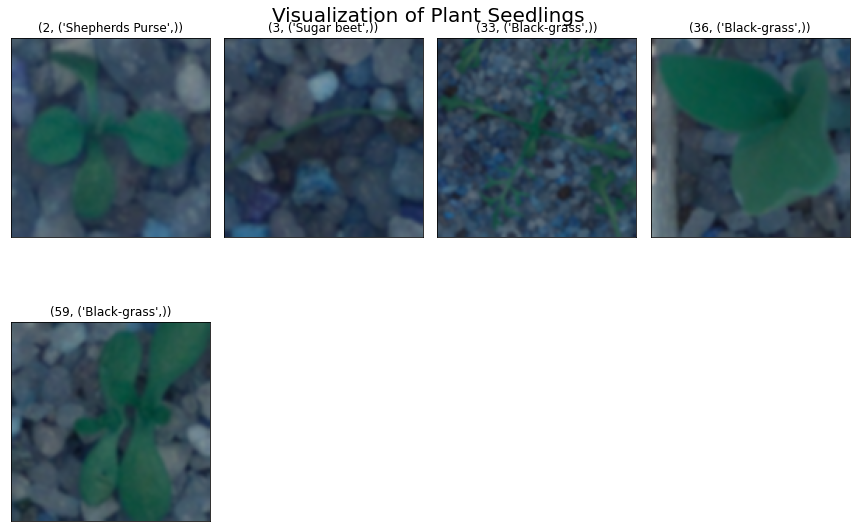

In [65]:
plt.figure(figsize=(12,12))

for i in range(5):  
    
    plt.subplot(3,4,i+1)
    labelValue = indices[i]
    plt.imshow(x_test_new[labelValue])
    predicted_label = train_label[np.argmax(y_pred[labelValue])]
    plt.title((labelValue,predicted_label))
    plt.xticks([]), plt.yticks([])

plt.suptitle("Visualization of Plant Seedlings", fontsize=20)    
plt.tight_layout()
plt.show()

**Visualization With new model (another model)**

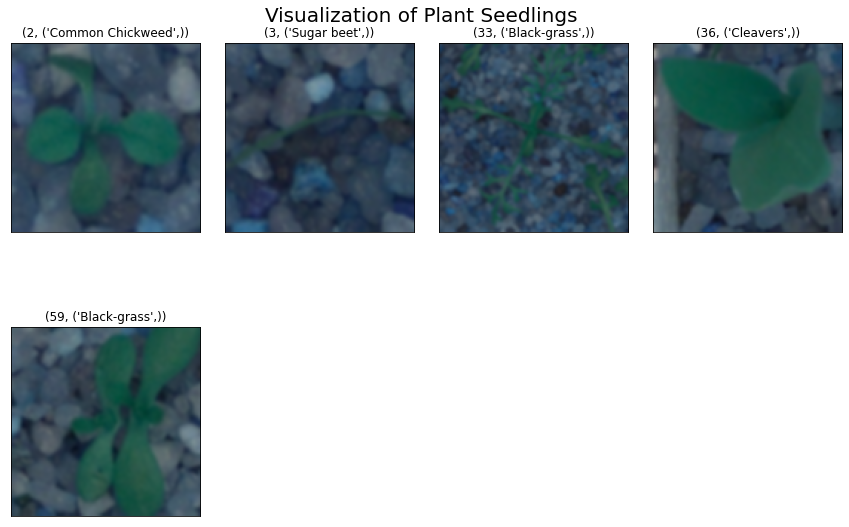

In [66]:
plt.figure(figsize=(12,12))

for i in range(5):  
    
    plt.subplot(3,4,i+1)
    labelValue = indices[i]
    plt.imshow(x_test_new[labelValue])
    predicted_label = train_label[np.argmax(new_y_pred[labelValue])]
    plt.title((labelValue,predicted_label))
    plt.xticks([]), plt.yticks([])

plt.suptitle("Visualization of Plant Seedlings", fontsize=20)    
plt.tight_layout()
plt.show()

In [67]:
y_pred.shape

(713, 12)

**Comparing few more predictions with labels**

In [68]:
indices1 = [10,32,55,99,150,202,350,505,588,620,680]
CompareActualAndPrediction(indices1,y_pred)

index =  10 : actual_label =  ('Sugar beet',) : predicted_label =  ('Sugar beet',)
index =  32 : actual_label =  ('Cleavers',) : predicted_label =  ('Cleavers',)
index =  55 : actual_label =  ('Maize',) : predicted_label =  ('Maize',)
index =  99 : actual_label =  ('Common Chickweed',) : predicted_label =  ('Common Chickweed',)
index =  150 : actual_label =  ('Loose Silky-bent',) : predicted_label =  ('Sugar beet',)
index =  202 : actual_label =  ('Loose Silky-bent',) : predicted_label =  ('Loose Silky-bent',)
index =  350 : actual_label =  ('Common wheat',) : predicted_label =  ('Black-grass',)
index =  505 : actual_label =  ('Fat Hen',) : predicted_label =  ('Fat Hen',)
index =  588 : actual_label =  ('Scentless Mayweed',) : predicted_label =  ('Fat Hen',)
index =  620 : actual_label =  ('Scentless Mayweed',) : predicted_label =  ('Scentless Mayweed',)
index =  680 : actual_label =  ('Charlock',) : predicted_label =  ('Black-grass',)


In [69]:
CompareActualAndPrediction(indices1,new_y_pred)

index =  10 : actual_label =  ('Sugar beet',) : predicted_label =  ('Sugar beet',)
index =  32 : actual_label =  ('Cleavers',) : predicted_label =  ('Cleavers',)
index =  55 : actual_label =  ('Maize',) : predicted_label =  ('Scentless Mayweed',)
index =  99 : actual_label =  ('Common Chickweed',) : predicted_label =  ('Common Chickweed',)
index =  150 : actual_label =  ('Loose Silky-bent',) : predicted_label =  ('Loose Silky-bent',)
index =  202 : actual_label =  ('Loose Silky-bent',) : predicted_label =  ('Loose Silky-bent',)
index =  350 : actual_label =  ('Common wheat',) : predicted_label =  ('Common wheat',)
index =  505 : actual_label =  ('Fat Hen',) : predicted_label =  ('Fat Hen',)
index =  588 : actual_label =  ('Scentless Mayweed',) : predicted_label =  ('Scentless Mayweed',)
index =  620 : actual_label =  ('Scentless Mayweed',) : predicted_label =  ('Scentless Mayweed',)
index =  680 : actual_label =  ('Charlock',) : predicted_label =  ('Charlock',)


**Comment:**

Comparing Actual label and predicted label, we get the sense of accuracy score.